#Model Machine Learning Memprediksi Keputusan Customer untuk Order

Tanggal Pembuatan Awal : 7 November 2024

Tanggal Perbaikan : -

Dibuat Oleh
Kelompok 2 :    
- Abdurrahman Al Ghifari (23000456)
- Ahmad Izzuddin Azzam (2300492)
- Julian Dwi Satrio (2300484)
- Meisya Amalia (2309357)
- Nuansa Bening Aura Jelita (2301410)

  Model ini dibuat berdasarkan data dari DMC2013 yang berisi data tentang aktivitas customer pada suatu aplikasi belanja online, data digunakan untuk memprediksi hasil akhir dari keputusan customer untuk melakukan order atau tidak melakukan order mempertimbangkan dari aktivitas yang dilakukan selama mengakses aplikasi belanja online tersebut.

  Proses pembuatan model machine learning terdiri dari 2 proses utama, yaitu yang pertama proses pengolahan data training dan yang kedua untuk mendesain model dari machine learning nya itu sendiri sehingga dapat menghasilkan output prediksi sesuai format yang sudah ditentukan (persession|prediksi.)

## Lakukan Exploration Data Analysis terhadap data

**Import Library yang akan digunakan**

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Penjelasan Setiap Library**

**1. pandas:** Library untuk manipulasi data dalam bentuk tabel (DataFrame) seperti mengimpor, membersihkan, mengelola, dan memproses data dengan mudah.

**2. xgboost:** Library untuk membangun model machine learning berbasis Gradient Boosting, sangat baik untuk tugas prediksi dan klasifikasi, dengan performa tinggi pada data kompleks.

**3. train_test_split:** Fungsi dari scikit-learn untuk membagi dataset menjadi data latih dan uji, sehingga memudahkan proses pelatihan dan evaluasi model.

**4. accuracy_score, classification_report, confusion_matrix:** Fungsi dari scikit-learn untuk mengevaluasi performa model:
- **accuracy_score:** Mengukur akurasi prediksi model.
- **classification_report:** Menampilkan metrik seperti precision, recall, dan F1-score untuk setiap kelas.
- **confusion_matrix:** Membuat matriks kebingungan (confusion matrix) yang menunjukkan prediksi benar dan salah.

**5. ConfusionMatrixDisplay:** Alat untuk menampilkan matriks kebingungan dalam bentuk grafik agar hasil klasifikasi lebih mudah dipahami.

**6. matplotlib.pyplot:** Library untuk membuat grafik dan visualisasi data, seperti menampilkan confusion matrix dan grafik lainnya.

**7. numpy:** Library untuk manipulasi array besar dan operasi matematika, sangat berguna dalam komputasi numerik yang cepat dan efisien.

**Read data**

In [2]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1GpevVev1-S1hcskOuFbI_2K6xgnk01kW", delimiter='|', encoding='ascii', na_values='?')
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y


**Melihat informasi sekilas pada data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        426248 non-null  float64
 6   cMaxPrice        426248 non-null  float64
 7   cSumPrice        426248 non-null  float64
 8   bCount           429013 non-null  int64  
 9   bMinPrice        423883 non-null  float64
 10  bMaxPrice        423883 non-null  float64
 11  bSumPrice        423883 non-null  float64
 12  bStep            237680 non-null  float64
 13  onlineStatus     268634 non-null  object 
 14  availability     263758 non-null  object 
 15  customerNo       277915 non-null  float64
 16  maxVal           275273 non-null  floa

**Penjelasan Setiap Kolom:**

1. **sessionNo**: Nomor unik yang menunjukkan sesi individu pengguna.

2. **startHour**: Jam sesi dimulai (0–23), berguna untuk melihat pola aktivitas harian.

3. **startWeekday**: Hari sesi dimulai (1=Senin hingga 7=Minggu), untuk analisis mingguan.

4. **duration**: Durasi sesi dalam detik, mencerminkan lamanya pengguna aktif dalam satu sesi.

5. **cCount**: Jumlah produk yang diklik dalam sesi, menunjukkan minat pengguna.

6. **cMinPrice**: Harga terendah dari produk yang diklik, memberi gambaran harga minimum yang dilihat pengguna.

7. **cMaxPrice**: Harga tertinggi dari produk yang diklik, menunjukkan tingkat maksimum harga yang dilihat.

8. **cSumPrice**: Total harga produk yang diklik, merefleksikan potensi pengeluaran.

9. **bCount**: Jumlah produk yang ditambahkan ke keranjang, indikator minat beli.

10. **bMinPrice**: Harga terendah produk di keranjang, menggambarkan rentang harga keranjang.

11. **bMaxPrice**: Harga tertinggi produk di keranjang, menunjukkan preferensi harga tertinggi.

12. **bSumPrice**: Total harga semua produk di keranjang, potensi total nilai belanja.

13. **bStep**: Langkah terakhir proses pembelian yang dicapai pengguna.

14. **onlineStatus**: Status apakah pengguna online (y/n) saat sesi berlangsung.

15. **availability**: Status ketersediaan produk yang dilihat oleh pengguna.

16. **customerID**: ID unik pelanggan, membantu identifikasi pelanggan.

17. **maxVal**: Harga pembelian maksimal yang diperbolehkan untuk pelanggan.

18. **customerScore**: Skor pelanggan dari perspektif toko, menilai nilai pelanggan.

19. **accountLifetime**: Lama akun pelanggan dalam bulan.

20. **payments**: Total pembayaran yang dilakukan pelanggan, mencerminkan riwayat belanja.

21. **age**: Usia pelanggan, berpengaruh pada preferensi produk.

22. **address**: Bentuk alamat pelanggan (1=Mr, 2=Mrs, 3=Company).

23. **lastOrder**: Jumlah hari sejak pesanan terakhir, menunjukkan frekuensi belanja.

24. **order**: Hasil dari sesi (y = ada pembelian, n = tidak ada pembelian).



**Cek apakah ada data yang duplikat**

In [4]:
df.duplicated().sum()

0

**Cek berapa banyak data yang mempunyai atribut kosong atau NULL**

In [5]:
df.isnull().sum()

,0
sessionNo,0
startHour,0
startWeekday,0
duration,0
cCount,0
cMinPrice,2765
cMaxPrice,2765
cSumPrice,2765
bCount,0
bMinPrice,5130


**Cek tipe data yang digunakan dalam setiap kolom pada data**

In [6]:
df.dtypes

,0
sessionNo,int64
startHour,int64
startWeekday,int64
duration,float64
cCount,int64
cMinPrice,float64
cMaxPrice,float64
cSumPrice,float64
bCount,int64
bMinPrice,float64


**Lakukan describe untuk melihat hasil perhitungan dari setiap atribut data**

In [7]:
df.describe()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bSumPrice,bStep,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,426248.000000,426248.000000,426248.000000,429013.000000,423883.000000,...,423883.000000,237680.000000,277915.000000,275273.000000,275273.000000,275273.000000,277915.000000,277617.000000,277915.000000,277915.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,55.289127,146.663005,1189.248209,4.135168,67.625341,...,213.260809,2.292393,12184.130921,2486.358270,485.298449,135.557403,15.218016,44.919861,1.734556,79.883975
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,148.879937,283.217841,3371.173815,4.451778,174.986371,...,459.389852,1.306963,7297.774184,3038.425813,131.027630,109.577139,34.892917,11.935945,0.443903,113.201967
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,3.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,6.990000,25.950000,137.960000,1.000000,8.990000,...,39.990000,1.000000,5793.000000,600.000000,481.000000,43.000000,3.000000,36.000000,1.000000,14.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,12.000000,49.990000,388.000000,3.000000,14.990000,...,87.970000,2.000000,12045.000000,1500.000000,520.000000,109.000000,8.000000,45.000000,2.000000,34.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,29.990000,99.990000,1046.430000,5.000000,34.990000,...,205.380000,3.000000,18350.000000,4000.000000,555.000000,219.000000,15.000000,53.000000,2.000000,86.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,5999.990000,6999.990000,115742.000000,108.000000,6999.990000,...,23116.880000,5.000000,25038.000000,50000.000000,638.000000,600.000000,868.000000,99.000000,3.000000,738.000000


**Melihat sekilas isi dari data**

In [8]:
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y


**Melakukan Imputasi atau mengisi nilai NULL pada data dengan median dan mode**

In [9]:
# Imputasi nilai NaN dengan nilai median untuk kolom numerik
df.fillna(df.median(numeric_only=True), inplace=True)
# Isi NaN untuk kolom non-numerik dengan mode (nilai yang paling sering muncul)
df.fillna(df.mode().iloc[0], inplace=True)

## Membuat model machine learning dari data yang sudah di Clean Up

**Membuat model untuk memprediksi dengan menggunakan XGBoost dan menampilkan confusion matrix nya**

Akurasi model: 0.7523163525750848
              precision    recall  f1-score   support

           0       0.72      0.38      0.50     27700
           1       0.76      0.93      0.84     58103

    accuracy                           0.75     85803
   macro avg       0.74      0.66      0.67     85803
weighted avg       0.75      0.75      0.73     85803



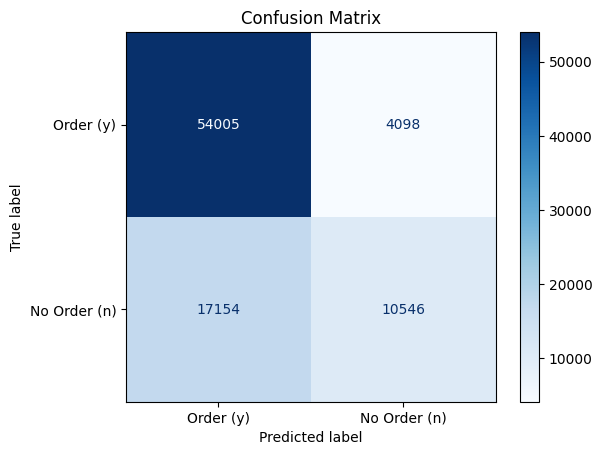

       sessionNo  prediction
0              1           1
1              2           0
2              3           1
3              4           0
4              5           1
...          ...         ...
49995      49996           1
49996      49997           1
49997      49998           1
49998      49999           1
49999      50000           0

[50000 rows x 2 columns]


In [10]:
# Pilih fitur dan target
X = df[['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice', 'bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep']]
y = df['order'].map({'y': 1, 'n': 0})  # Gunakan kolom 'order' sebagai target

# Bagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Order (y)', 'No Order (n)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Prediksi pada keseluruhan data untuk setiap sessionNo
df['PredictedOrderStatus'] = model.predict(X)

# Mengambil prediksi per sessionNo
session_predictions = df.groupby('sessionNo')['PredictedOrderStatus'].agg(lambda x: round(np.mean(x))).reset_index()
session_predictions.columns = ['sessionNo', 'prediction']

# Tampilkan hasil prediksi
print(session_predictions)


**Menyimpan hasil yang sudah di generate oleh model machine learning diatas kedalam file 'predicted_order_status'**

In [11]:
# Simpan hasil prediksi per session ke dalam file TXT
session_predictions.to_csv('predicted_order_status.txt', index=False, sep='|')

## Kesimpulan

Dari proses pembuatan model machine learning yang telah dilakukan dapat ditarik kesimpulan bahwa model machine learning ini cukup baik dalam memprediksi keputusan customer untuk order atau tidak menimbang dari aktivitas yang customer lakukan pada data yang telah disediakan. Akurasi yang didapat oleh model ini adalah 0.7523163525750848, atau bisa dibilang 75% pada data trainingnya, memungkinkan pengembangan yang lebih baik kedepannya dalam menghadapi data test sampai model mendekati sempurna dalam memprediksi keputusan order customer.